# STAT - Series 1

In [1]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

### Exercise 1.1

In [2]:
# Load data
anscombe = pd.read_csv('./data/anscombe.csv')

In [3]:
# 1.1 a) 
# linear regression

x1_set = sm.add_constant(anscombe.loc[:, 'x1'])
y1_set = anscombe.loc[:, 'y1']
model1 = sm.OLS(y1_set, x1_set).fit()

x2_set = sm.add_constant(anscombe.loc[:, 'x1'])
y2_set = anscombe.loc[:, 'y1']
model2 = sm.OLS(y2_set, x2_set).fit()

x3_set = sm.add_constant(anscombe.loc[:, 'x1'])
y3_set = anscombe.loc[:, 'y1']
model3 = sm.OLS(y3_set, x3_set).fit()

x4_set = sm.add_constant(anscombe.loc[:, 'x1'])
y4_set = anscombe.loc[:, 'y1']
model4 = sm.OLS(y4_set, x4_set).fit()

print(f'a) intercept / slope for all models \n1) \n{model1.params}\n2) \n{model2.params}\n3) \n{ model3.params}\n4) \n{model4.params}')


a) intercept / slope for all models 
1) 
const    3.000091
x1       0.500091
dtype: float64
2) 
const    3.000091
x1       0.500091
dtype: float64
3) 
const    3.000091
x1       0.500091
dtype: float64
4) 
const    3.000091
x1       0.500091
dtype: float64


In [11]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Sat, 19 Apr 2025   Prob (F-statistic):            0.00217
Time:                        12:54:50   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.0

In [ ]:
print(model1.bse)

const    1.124747
x1       0.117906
dtype: float64


In [19]:
model1.pvalues

const    0.025734
x1       0.002170
dtype: float64

In [ ]:
from scipy.stats import t
t_statistic = model1.tvalues
degrees_of_freedom = model1.df_resid

p_two_sides = 2 * (1-t.cdf(t_statistic, degrees_of_freedom))

In [24]:
p_two_sides


0.0021696288730788105

b) regression line for all models


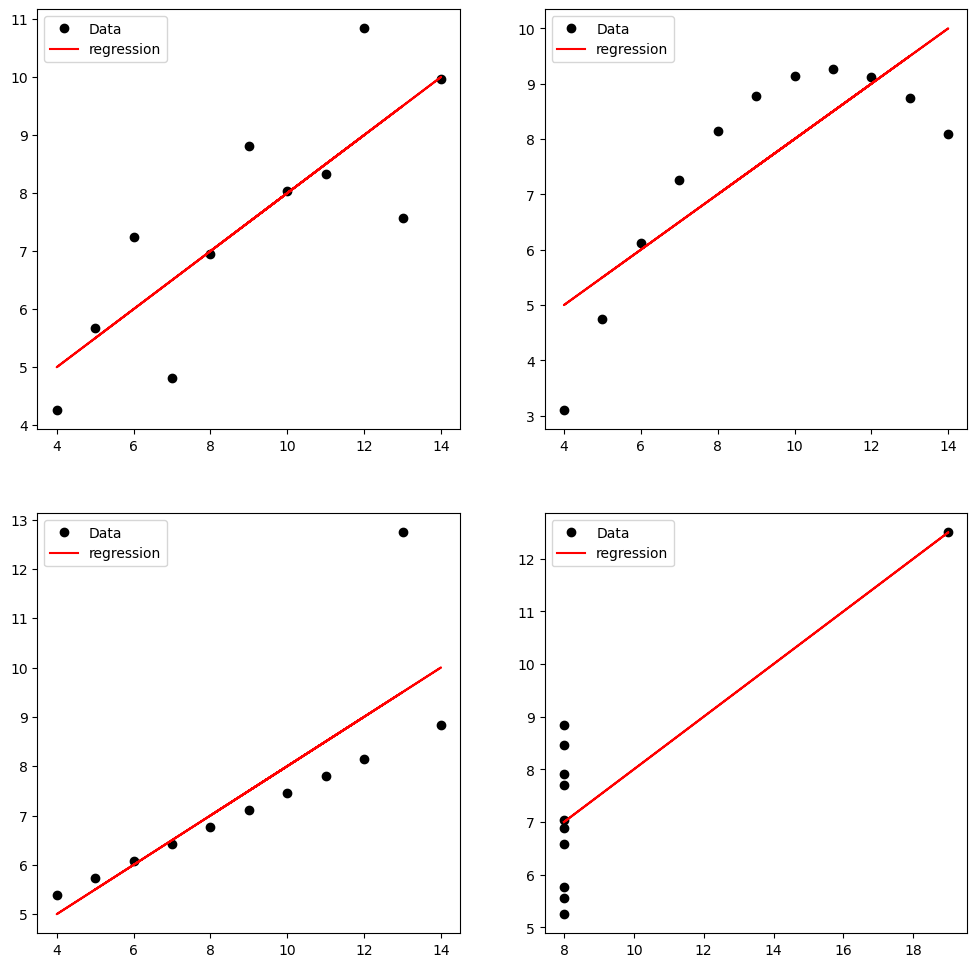

In [5]:
# 1.1 b) regression line plots
y1_pred = model1.params[0] + model1.params[1] * anscombe.loc[:, 'x1']
y2_pred = model2.params[0] + model2.params[1] * anscombe.loc[:, 'x2']
y3_pred = model3.params[0] + model3.params[1] * anscombe.loc[:, 'x3']
y4_pred = model4.params[0] + model4.params[1] * anscombe.loc[:, 'x4']

# Create figure and subfigures:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Plot scatter data
ax[0,0].plot(anscombe.loc[:, 'x1'], anscombe.loc[:, 'y1'], 'ok', label='Data')
ax[0,1].plot(anscombe.loc[:, 'x2'], anscombe.loc[:, 'y2'], 'ok', label='Data')
ax[1,0].plot(anscombe.loc[:, 'x3'], anscombe.loc[:, 'y3'], 'ok', label='Data')
ax[1,1].plot(anscombe.loc[:, 'x4'], anscombe.loc[:, 'y4'], 'ok', label='Data')

# Plot regression line
ax[0,0].plot(anscombe.loc[:, 'x1'], y1_pred, 'r', label='regression')
ax[0,1].plot(anscombe.loc[:, 'x2'], y2_pred, 'r', label='regression')
ax[1,0].plot(anscombe.loc[:, 'x3'], y3_pred, 'r', label='regression')
ax[1,1].plot(anscombe.loc[:, 'x4'], y4_pred, 'r', label='regression')

# Add lables.
ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()
ax[1, 1].legend()

print(f'b) regression line for all models')
plt.show()

### Exercise 1.2

In [6]:
clock = pd.read_csv('./data/antique_clocks.csv')

Functional dependence: The plot is rather scattered, bu suggests a general linear behaviour. --> The older the clock, the higher the price.


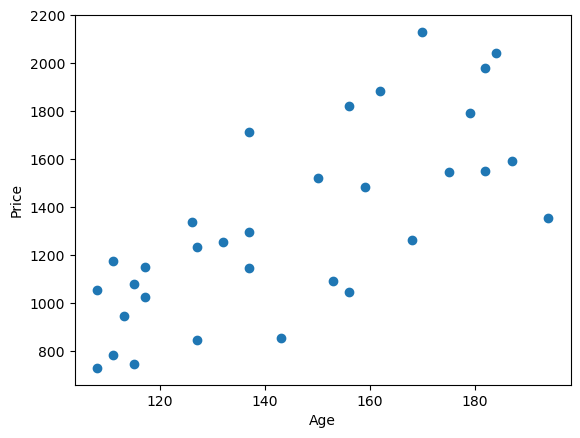

In [7]:
# 1.2 a)Display the data as a scatter plot (price vs. age) and describe their functional dependence.
plt.scatter(clock.loc[:, 'age'], clock.loc[:, 'price'])
plt.xlabel('Age')
plt.ylabel('Price')

# functional dependence: 
print('Functional dependence: The plot is rather scattered, bu suggests a general linear behaviour. --> The older the clock, the higher the price.')

In [8]:
# 1.2 b) Use a linear model to describe the relationship between price and age and determine the estimated coefﬁcients.
x = clock.loc[:, 'age']
y = clock.loc[:, 'price']

x_sm = sm.add_constant(x) 
model = sm.OLS(y, x_sm).fit()



beta_0, beta_1 = model.params
print(f'b) \nBeta_0_pred = {beta_0:.2f}\nBeta_1_pred = {beta_1:.2f}')


b) 
Beta_0_pred = -191.66
Beta_1_pred = 10.48


Text(0, 0.5, 'Price')

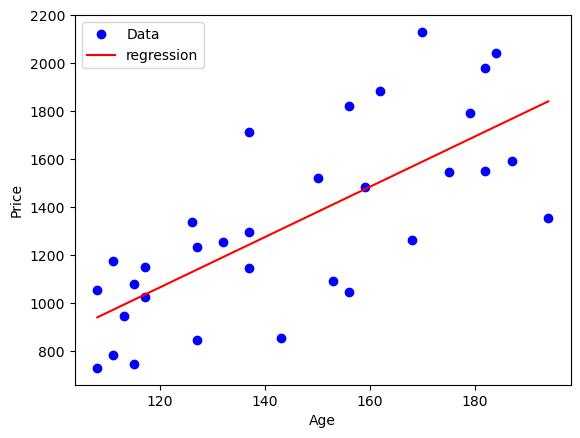

In [9]:
# 1.2 c) Draw a regression line in the scatter plot in a). Comment on the results.
y_reg = beta_0 + beta_1 * x

# ax[0]scatter(x, y, label='Data')
plt.plot(x, y, 'ok', color='blue', label='Data')
plt.plot(x,y_reg, color='r', label='regression')

plt.legend()
plt.xlabel('Age')
plt.ylabel('Price')

### Exercise 1.3

In [10]:
windmill = pd.read_csv('./data/windmill.csv')
windmill.head()

,wind_speed,current
0,11.187073,1.582
1,13.424487,1.822
2,7.607209,1.057
3,6.041019,0.500
4,22.374145,2.236


It can be observed, that the inversed data follows a (negativ) linear pattern, while the original data is more scattered and shows logarithmic (positiv) growth.


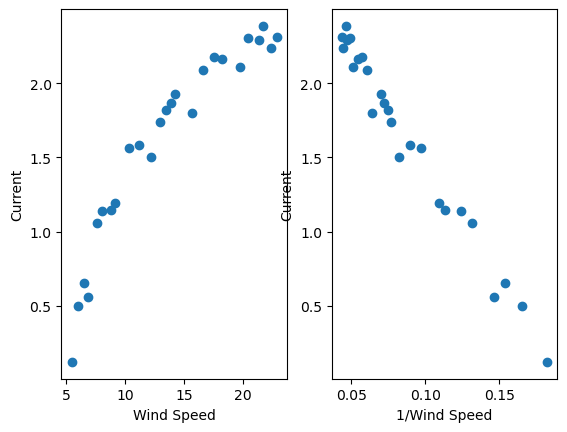

In [11]:
# 1.3 a) Generate a scatter plot (current (y-axis) vs. wind speed) and another scatter plot (current vs. 1/wind speed). What do you observe?
x = windmill.loc[:, 'wind_speed']
y = windmill.loc[:, 'current']
x_inv = 1 / x

fig, ax = plt.subplots(1, 2)

ax[0].scatter(x, y)
ax[0].set_xlabel('Wind Speed')
ax[0].set_ylabel('Current')
ax[1].scatter(x_inv, y)
ax[1].set_xlabel('1/Wind Speed')
ax[1].set_ylabel('Current')

print('It can be observed, that the inversed data follows a (negativ) linear pattern, while the original data is more scattered and shows logarithmic (positiv) growth.')
plt.show()


Beta_0 = 2.9789, std error = 0.0449
Beta_1 = -15.5155, std. Error = 0.4619


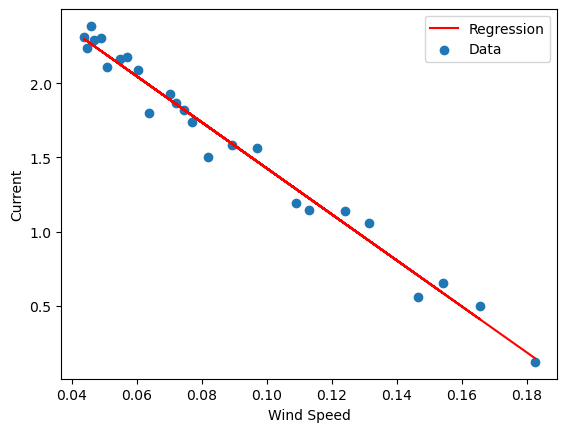

In [12]:
# 1.3 b) Use the least squares method to ﬁt the model
x = 1 / windmill.loc[:, 'wind_speed']
y = windmill.loc[:, 'current']
x_sm = sm.add_constant(x)

model = sm.OLS(y, x_sm).fit()

# print(model.summary())

print(f'Beta_0 = {model.params[0]:.4f}, std error = {model.bse[0]:.4f}\nBeta_1 = {model.params[1]:.4f}, std. Error = {model.bse[1]:.4f}')

beta_0, beta_1 = model.params
y_reg = beta_0 + beta_1 * x
plt.scatter(x, y, label='Data')
plt.plot(x, y_reg, color='r', label='Regression')
plt.xlabel('Wind Speed')
plt.ylabel('Current')
plt.legend()
plt.show()

In [13]:
# 1.3 c) Determine a 99 % conﬁdence interval for β1. The conﬁdence interval can be found using: OLSResults.conf_int(alpha=0.01), where OLSResultsis your ﬁtted model.
model = sm.OLS(y, x_sm).fit()
model.conf_int(alpha=0.01)

,0,1
const,2.852804,3.104916
wind_speed,-16.812102,-14.218812


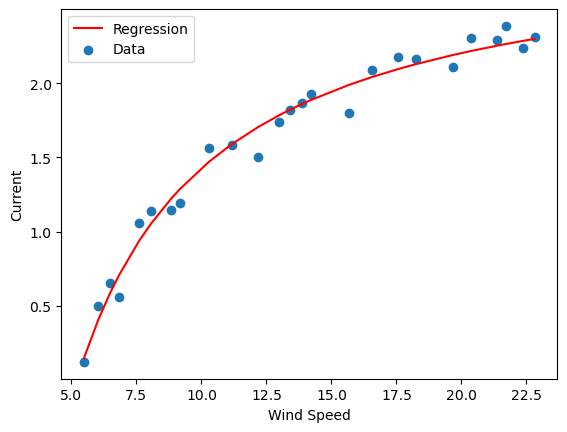

Interpretation: 
Beta_0: As the wind speed approaches infinity, Beta_0 becomes the maximum. 
Beta_1: The larger Beta_1, the larger the wind speed has to be, in order to have a windmill producing power.


In [14]:
# 1.3 d) Generate a scatter plot (current vs. wind speed). How do you interpret the coefﬁcients β0 and β1 in these plots ? 
# Hint: Let the wind speed approach inﬁnity to interpret β0 and set the current to zero in order to interpret β1. A sketch may be useful.
import numpy as np

x = np.sort(windmill['wind_speed'])
y_reg = beta_0 + beta_1 * 1/x

plt.scatter(windmill.loc[:, 'wind_speed'], windmill.loc[:, 'current'], label='Data')
plt.plot(x, y_reg, color='r', label='Regression')
plt.xlabel('Wind Speed')
plt.ylabel('Current')
plt.legend()
plt.show()

print('Interpretation: \nBeta_0: As the wind speed approaches infinity, Beta_0 becomes the maximum. \nBeta_1: The larger Beta_1, the larger the wind speed has to be, in order to have a windmill producing power.')

In [15]:
# 1.3 e) Determine the expected value, a 95 % conﬁdence interval for the expected current 
# and a 95 % prediction interval at wind speeds of 1ms and 10ms. Comment on the results.

# code from step b
x = 1 / windmill.loc[:, 'wind_speed']
y = windmill.loc[:, 'current']
x_sm = sm.add_constant(x)

model = sm.OLS(y, x_sm).fit()

x0 = [1/1, 1/10]
x0 = sm.add_constant(x0)

x_pred = (model.get_prediction(x0).summary_frame(alpha=0.05))
x_pred

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-12.536597,0.421537,-13.408613,-11.664581,-13.430108,-11.643086
1,1.427314,0.019600,1.386768,1.467861,1.228331,1.626298


In [16]:
x_pred.loc[:, ['mean', 'mean_ci_lower', 'mean_ci_upper', 'obs_ci_lower', 'obs_ci_upper']]

,mean,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-12.536597,-13.408613,-11.664581,-13.430108,-11.643086
1,1.427314,1.386768,1.467861,1.228331,1.626298


### Exercise 1.4

In [17]:
forbes = pd.read_csv('./data/forbes.csv') # y = boiling point
forbes.head()

,y,pressure
0,194.5,20.79
1,194.3,20.79
2,197.9,22.40
3,198.4,22.67
4,199.4,23.15


Observation: Neither plot is scattered, both follow a positive linear pattern. 


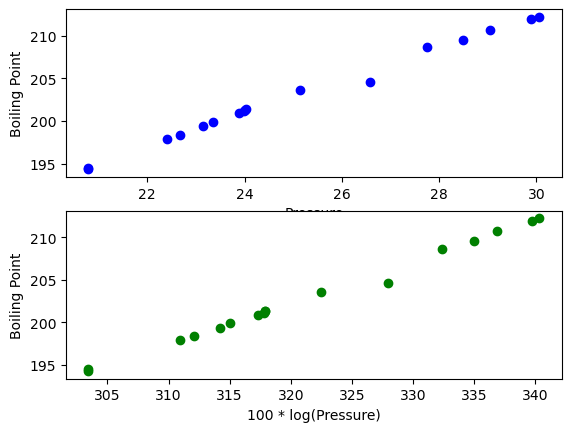

In [18]:
# 1.4 a) Add the variable x= 100 · log(pressure) to the data frame Forbes and plot y versus 
# pressure and y versus x. Comment on your observations with respect to the two plots.

forbes['x'] = 100 * np.log(forbes['pressure'])
y = forbes['y']
x = forbes['x']
pressure = forbes['pressure']

fig, ax = plt.subplots(2, 1)
ax[0].scatter(pressure, y, color='blue')
ax[0].set_xlabel('Pressure')
ax[0].set_ylabel('Boiling Point')
ax[1].scatter(x, y, color='green')
ax[1].set_xlabel('100 * log(Pressure)')
ax[1].set_ylabel('Boiling Point')

print("Observation: Neither plot is scattered, both follow a positive linear pattern. ")

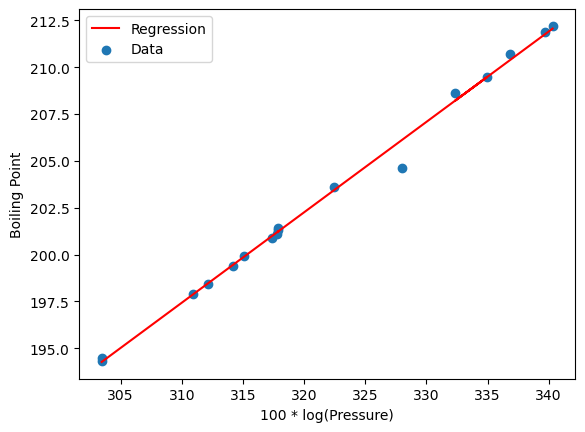

Observation: The regression line fits the data well with one outlier.
Beta_0 = 47.8638, std error = 2.8517
Beta_1 = 0.4825, std. Error = 0.0089


In [19]:
# 1.4 b) Use a least squares ﬁt to determine the regression line for y versus x. Have a
# look at the regression line in the scatter plot and describe your observations of the result.

x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()
y_reg = model.params[0] + model.params[1] * x

plt.scatter(x,y, label='Data')
plt.plot(x, y_reg, color='r', label='Regression')
plt.legend()
plt.xlabel('100 * log(Pressure)')
plt.ylabel('Boiling Point')
plt.show()

print("Observation: The regression line fits the data well with one outlier.")

print(f'Beta_0 = {model.params[0]:.4f}, std error = {model.bse[0]:.4f}\nBeta_1 = {model.params[1]:.4f}, std. Error = {model.bse[1]:.4f}')

# identify outliers
# from statsmodels.stats.outliers_influence import OLSInfluence
# OLSInfluence(model).summary_table()

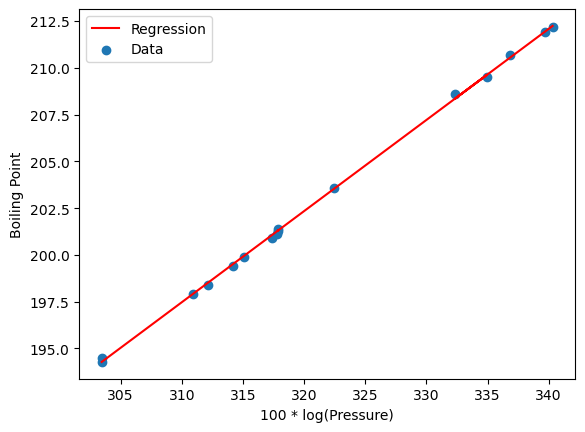

Beta_0 = 46.4530, std error = 0.8683
Beta_1 = 0.4872, std. Error = 0.0027
While the values for Beta 0 and Beta 1 have not changed substantially, the standard errors of Beta 0 has decreased.


In [20]:
# 1.4 c) TUse a least squares ﬁt to determine the regression line for yversus x, but now
# omit the 12th observation. Compare the values βˆ0, βˆ1, se(βˆ0), se(βˆ1) and σˆ with
# the ones you have found in part b).

x_drop = x.drop(11)
y_drop = y.drop(11)
x_sm = sm.add_constant(x_drop)
model = sm.OLS(y_drop, x_sm).fit()
y_reg = model.params[0] + model.params[1] * x_drop

plt.scatter(x_drop,y_drop, label='Data')
plt.plot(x_drop, y_reg, color='r', label='Regression')
plt.legend()
plt.xlabel('100 * log(Pressure)')
plt.ylabel('Boiling Point')
plt.show()

print(f'Beta_0 = {model.params[0]:.4f}, std error = {model.bse[0]:.4f}\nBeta_1 = {model.params[1]:.4f}, std. Error = {model.bse[1]:.4f}')
print("While the values for Beta 0 and Beta 1 have not changed substantially, the standard errors of Beta 0 has decreased.")

In [ ]:
# 1.4 d) Test H0 : β1 = 0 versus HA : β1 6= 0 in the model Yi = β0 + xi + ǫi using the
# output of the regression analysis at the 5 %-level.

print(f'{model.pvalues[1]:.3}')
print('The p-value is smaller than 0.05, so we reject the null hypothesis. Beta_1 is significantly different from 0.')


5.77e-25
The p-value is smaller than 0.05, so we reject the null hypothesis. Beta_1 is significantly different from 0.


In [37]:
# 1.4 e) Determine a 95 %-conﬁdence interval for the slope β1.
confint = model.conf_int(alpha=0.05)
print(np.round(confint, 3))

            0       1
const  44.591  48.315
x       0.481   0.493


In [43]:
# 1.4 f) Determine the expected value of Y given the predictor value x0 = 100 ·
# log(26) = 325.81. Determine a 95 % and a 99 % conﬁdence interval for E[Y|x0].

x0 = [[1, 325.81]]
pred_95 = model.get_prediction(x0).summary_frame(alpha=0.05)
pred_99 = model.get_prediction(x0).summary_frame(alpha=0.01)

print(f"95%:\n {pred_95.loc[:, ['mean', 'mean_ci_lower', 'mean_ci_upper']]}")
print(f"99%:\n {pred_99.loc[:, ['mean', 'mean_ci_lower', 'mean_ci_upper']]}")

95%:
          mean  mean_ci_lower  mean_ci_upper
0  205.172621     205.098906     205.246337
99%:
          mean  mean_ci_lower  mean_ci_upper
0  205.172621     205.070308     205.274934


In [ ]:
# 1.4 g( Determine a 99 % prediction interval for the observed value of Y for x0 = 325.81.
# Compare this interval with the conﬁdence interval you have found in exercise f).

x0 = [[1, 325.81]]
pred_95 = model.get_prediction(x0).summary_frame(alpha=0.05)
pred_99 = model.get_prediction(x0).summary_frame(alpha=0.01)

print(f"95%:\n {pred_95.loc[:, ['mean', 'obs_ci_lower', 'obs_ci_upper']]}")
print(f"99%:\n {pred_99.loc[:, ['mean', 'obs_ci_lower', 'obs_ci_upper']]}")

95%:
          mean  obs_ci_lower  obs_ci_upper
0  205.172621    204.889504    205.455738
99%:
          mean  obs_ci_lower  obs_ci_upper
0  205.172621    204.779671    205.565572


### Exercise 1.5

In [50]:
import numpy as np
import statsmodels.api as sm
from scipy.stats import norm

# Set random seed
np.random.seed(0)
# Set number of random simulations
n = 100
# xi as given
x_i = np.array([0, 3, 4, 8, 10, 11, 13, 16, 17, 20])
x_i_sm = sm.add_constant(x_i)

# random error, taken from normal distribution:
e_i = norm.rvs(loc=0, scale=2, size=10*n) # Set accordingly
e_i = e_i.reshape((10, n))

# predifine Y_i, and the regression coefficients
Y_i = np.zeros((n, 10))
b_0, b_1 = np.zeros((n)), np.zeros((n))

for i in range(n):
    # Find Y_i
    Y_i[i] = 4 + 2 * x_i + e_i[:, i]
    # Perform linear regression
    model = sm.OLS(Y_i[i], x_i_sm).fit()
    # Save Regression coefficients
    b_0[i] = model.params[0]
    b_1[i] = model.params[1]
print('Regression Coefficient Beta_0:\n', np.round(b_0, 4),
'\n\nRegression Coefficient Beta_1:\n', np.round(b_1, 4))

Regression Coefficient Beta_0:
 [6.0507 3.915  4.7938 6.294  4.85   2.4759 3.9228 2.7033 5.0208 4.6491
 5.8076 6.7081 3.4594 5.207  3.9796 4.1404 6.0199 3.9423 6.112  4.5119
 2.2456 3.0064 3.6296 4.1368 4.3559 1.8767 4.3053 5.0968 4.0674 5.2404
 2.1534 3.726  3.2561 3.0106 1.3075 5.4843 5.9688 3.4549 4.3206 4.3193
 2.2705 2.2496 2.0365 4.2883 4.8103 3.0268 3.1395 4.7882 1.9338 2.8627
 3.7855 4.8827 3.5141 2.4638 4.056  4.6896 3.1785 2.5837 1.009  4.3932
 2.9419 3.9548 3.7134 2.3267 2.1877 5.1588 2.3017 2.794  2.9854 3.7
 5.0878 1.7886 6.5628 2.431  3.116  4.4749 3.6265 2.7497 2.8666 6.1476
 1.6653 4.8467 2.5968 1.9696 6.0669 3.4811 3.6797 3.9826 3.2473 6.3438
 2.7248 4.6535 5.5642 2.7909 5.2313 4.5273 4.7451 6.6291 5.253  5.8249] 

Regression Coefficient Beta_1:
 [1.7737 1.9815 1.9443 1.8621 1.8932 2.1971 1.9911 1.982  1.9407 1.9986
 1.7922 1.8237 2.0504 1.8137 2.009  2.0781 1.8402 2.0489 1.925  1.9732
 2.0903 2.0672 1.9901 1.954  1.8943 2.1671 1.9856 2.0435 2.0023 1.9816
 2.1169 1.988

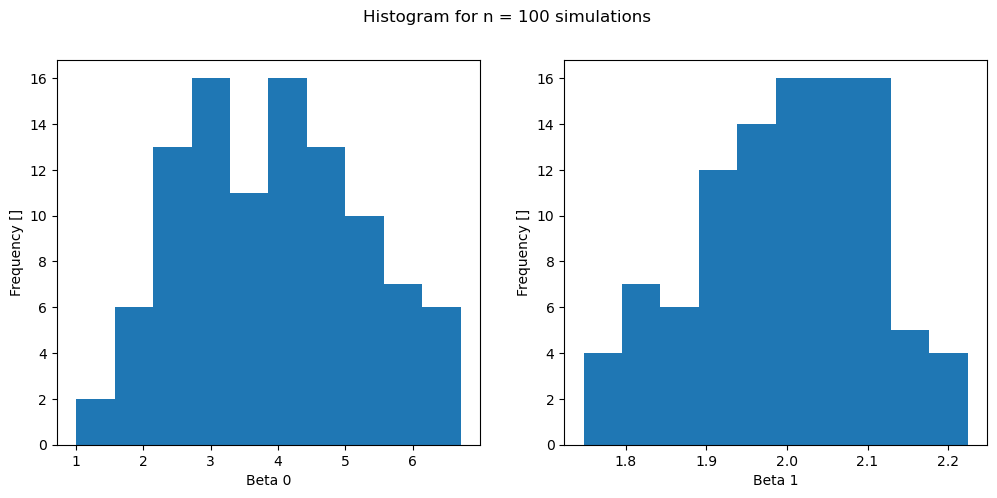

In [55]:
import matplotlib.pyplot as plt
# Create figure and subfigures:
fig = plt.figure(figsize=(12, 5))
# Create axes in subplots
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
# histogram plots
ax1.hist(b_0)
ax2.hist(b_1)
# Set labels:
ax1.set_xlabel('Beta 0')
ax2.set_xlabel('Beta 1')
ax1.set_ylabel('Frequency []')
ax2.set_ylabel('Frequency []')
title = 'Histogram for n = ' + str(n) + ' simulations'
fig.suptitle(title)
# show plot
plt.show()

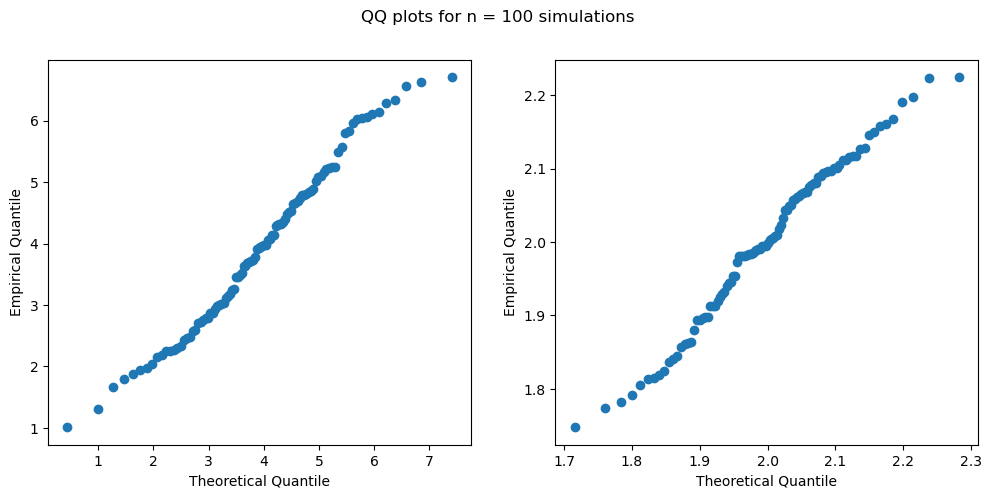

In [56]:
# Quantiles
alphak = (np.arange(1, b_0.size + 1) - 0.5) / b_0.size
q_theor_b0 = norm.ppf(q=alphak, loc=b_0.mean(), scale=b_0.std())
q_theor_b1 = norm.ppf(q=alphak, loc=b_1.mean(), scale=b_1.std())
q_empir_b0 = np.sort(b_0)
q_empir_b1 = np.sort(b_1)
# Create figure and subfigures:
fig = plt.figure(figsize=(12, 5))
# Create axes in subplots
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
# Plot figure
ax1.plot(q_theor_b0, q_empir_b0, "o")
ax2.plot(q_theor_b1, q_empir_b1, "o")
# Labels
ax1.set_xlabel("Theoretical Quantile")
ax1.set_ylabel("Empirical Quantile")
ax2.set_xlabel("Theoretical Quantile")
ax2.set_ylabel("Empirical Quantile")
title = 'QQ plots for n = ' + str(n) + ' simulations'
fig.suptitle(title)
plt.show()

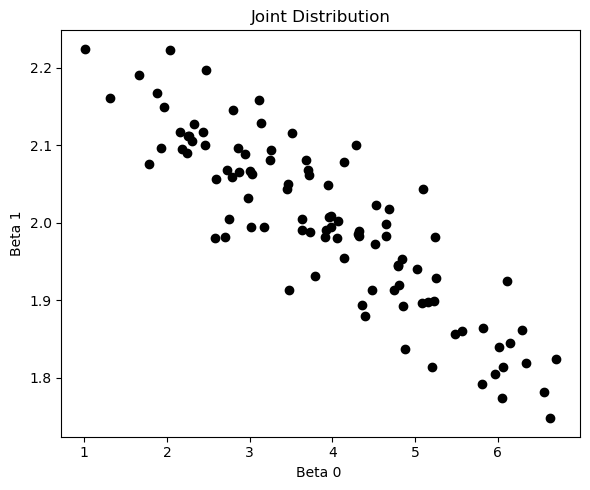

In [58]:
fig = plt.figure(figsize=(6, 5))
# Create axes in subplots
ax = fig.add_subplot(1, 1, 1)
# Plot scatter data
ax.plot(b_0, b_1, 'ok')
# Set labels:
ax.set_xlabel('Beta 0 ')
ax.set_ylabel('Beta 1')
plt.title('Joint Distribution')
# show plot
plt.tight_layout()
plt.show()

In [59]:
# Means:
b0_mean = np.round(b_0.mean(), 4)
b1_mean = np.round(b_1.mean(), 4)
# Standard deviation
b0_std = np.round(b_0.std() / np.sqrt(2), 4)
b1_std = np.round(b_1.std() / np.sqrt(2), 4)
# Variances:
b0_var = np.round(b_0.var(), 4)
b1_var = np.round(b_1.var(), 4)
print('Means:\n', b0_mean, b1_mean,
'\nStandard deviations:\n', b0_std, b1_std,
'\nVariances:\n', b0_var, b1_var )

Means:
 3.9223 1.9987 
Standard deviations:
 0.9553 0.0777 
Variances:
 1.8251 0.0121


In [60]:
# Se Beta 0:
SSx = np.sum((x_i - x_i.mean()) ** 2)
b0_se = np.sqrt(2 * (1 / 10 + x_i.mean() **2 / SSx ))
# Se Beta 1:
b1_se = np.sqrt(2 / SSx)
print('Se Beta 0: ', np.round(b0_se, 4),
'\nSe Beta 1: ', np.round(b1_se, 4))

Se Beta 0:  0.8616 
Se Beta 1:  0.0722
